# ルンゲ・クッタ法
**ルンゲ・クッタ法（Runge-Kutta Method）** は前述した修正したオイラー法と同様に複数の点で評価された導関数を用いた高次近似であり，常微分方程式の初期値問題を解くための一般的な数値解法である．中点法やホイン法は二次のルンゲ・クッタ法として知られており，実応用上，4点の情報を利用した4次のルンゲ・クッタ法が利用される．ここでは導出は行わないが，近似式は以下で与えられる．

$$
\begin{align}
x_{i+1}=x_i+\frac{1}{6}\left(k_1+2 k_2+2 k_3+k_4\right)
\end{align}
$$

ただし

$$
\begin{align}
k_1 & =h f\left(x_i, t_i\right), \\
k_2 & =hf\left(t_i+\frac{h}{2}, x_i+\frac{k_1}{2}\right), \\
k_3 & =hf\left(t_i+\frac{h}{2}, x_i+\frac{k_2}{2}\right), \\
k_4 & =hf\left(x_i+k_3, t_i+h\right) .\end{align}
$$

とする．ルンゲ・クッタ法はTaylor展開の4次の項までを一致させるように複数時刻の係数を選んだアルゴリズムであり，$O(h^4)$ の誤差を持つ優れた推定精度を持つ．

## Pythonによる実装
次の微分方程式

$$
x'=(t-x)^2, x(0)=0
$$

をルンゲクッタ法で解く．解析解は $x=t-\tanh t$ で与えられる．以下にpythonによるソースコードを示す．

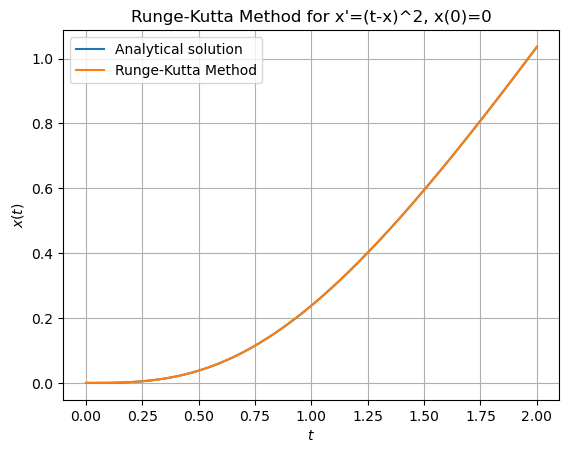

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_method(f, x0, t0, tn, h):
    """
    ルンゲ・クッタ法を用いて常微分方程式を数値的に解く関数
    :param f: 常微分方程式の右辺の関数 f(t, x)
    :param x0: 初期値 x(t0)
    :param t0: 初期時刻
    :param tn: 最終時刻
    :param h: 刻み幅
    :return: 時刻と近似解のリスト
    """
    t_values = [t0] # t_0の値を格納したリストを作成
    x_values = [x0] # x_0の値（初期値）を格納したリストを作成
    
    t = t0
    x = x0
    
    while t < tn: # 最終時刻になるまで繰り返す
        k1 = h * f(t, x)
        k2 = h * f(t + h/2, x + k1/2)
        k3 = h * f(t + h/2, x + k2/2)
        k4 = h * f(t + h, x + k3)
        
        x += (k1 + 2*k2 + 2*k3 + k4) / 6
        t += h
        
        # 計算された値をリストに追加
        t_values.append(t)
        x_values.append(x)
        
    return t_values, x_values

# 微分方程式の右辺
def f(t, x):
    return (t - x)**2

# 解析解
def analytical_solution(t):
    return t - np.tanh(t)

# 初期値とパラメータ
x0 = 0 # 初期値
t0 = 0 # 開始時刻
tn = 2 # 終了時刻
h = 0.01 # 刻み幅

# ルンゲ・クッタ法での数値解の計算
t_values, x_values = runge_kutta_method(f, x0, t0, tn, h)

plt.figure()
t_analytical = np.linspace(t0, tn, 500) # 区間[開始時刻,終了時刻]で時刻を500点サンプリング
x_analytical = analytical_solution(t_analytical) # 解析解の計算
plt.plot(t_analytical, x_analytical, label='Analytical solution') # 解析解のプロット 

t_values, x_values = runge_kutta_method(f, x0, t0, tn, h) # ルンゲ・クッタ法の実行
plt.plot(t_values, x_values, label='Runge-Kutta Method') # 結果のプロット
plt.title("Runge-Kutta Method for x'=(t-x)^2, x(0)=0")
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.grid(True)
plt.legend()
plt.show()